- load the data from lat-lng.csv

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('with_user_id.csv')

In [17]:
len(df)

1048575

In [18]:
df.head(3)

,userid,lat,lng
0,0,30.269103,-97.749395
1,0,30.255731,-97.763386
2,0,30.263418,-97.757597


In [19]:
df_us = df[(df['lat']>0) & (df['lng']<0)]

In [9]:
len(df_us)

932093

In [12]:
df_us_sam = df_us.sample(frac = .1, random_state=101)

In [24]:
df_us_sam.columns

Index(['userid', 'lat', 'lng'], dtype='object')

In [13]:
len(df_us_sam)

93209

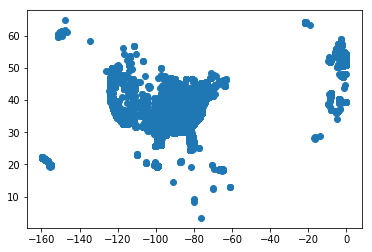

In [14]:
plt.scatter(df_us_sam['lng'], df_us_sam['lat'])

- plot the graph for understanding data

- create an object of KMeans by importing from sklearn.cluster

In [21]:
from sklearn.cluster import KMeans

- use fit of the kmeans object and pass in data

In [22]:
kmeans = KMeans(n_clusters=50)

In [51]:
kmeans.fit(df_us_sam[['lat', 'lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.inertia_

61813.00010125908

In [56]:
inertia

[31419229.576221325,
 3369100.558407037,
 1441558.1131988824,
 990274.8650682463,
 533570.2447094979,
 318624.0733243268,
 206945.83208634157]

In [64]:
kn = [2,5,8,10,12,15,20,25,30,35,50,55]

In [58]:
for k in kn:
    print("for k", k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_us_sam[['lat','lng']])
    inertia.append(kmeans.inertia_)

for k 30
for k 35
for k 50
for k 55
for k 60


In [65]:
len(inertia), len(kn)

(12, 12)

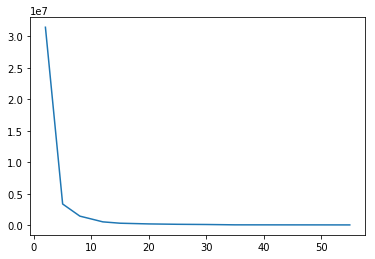

In [66]:
plt.plot(kn, inertia)

- check the cluster centers

In [27]:
kmeans.cluster_centers_

array([[  30.26936605,  -97.78475465],
       [  51.53096054,   -0.45688843],
       [  37.69423088, -122.17340195],
       [  38.95928169,  -76.86106651],
       [  21.28968866, -157.80697665],
       [  39.46024634,  -89.73141469],
       [  26.02900606,  -80.40702455],
       [  33.33407573, -117.17995227],
       [  47.617163  , -122.29979602],
       [  39.80110873, -105.166705  ],
       [  35.47995596,  -82.45924662],
       [  32.87842018,  -96.93193646],
       [  42.35499283,  -71.18276907],
       [  43.0791712 ,  -79.72424846],
       [  40.69794587,  -74.10684848],
       [  43.04383285,  -88.53568407],
       [  61.16225492, -149.77308828],
       [  39.22851976,  -94.83812542],
       [  30.3224668 ,  -90.10965711],
       [  18.05157775,  -66.22825051],
       [  41.54031012,  -82.83139674],
       [  35.64096086,  -97.45044922],
       [  36.09172994, -115.14826755],
       [  44.89334092,  -93.36135051],
       [  38.72221309,   -7.35935451],
       [  32.20157478,  -

In [28]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns =['lat', 'lng'])

In [29]:
centers

,lat,lng
0,30.269366,-97.784755
1,51.530961,-0.456888
2,37.694231,-122.173402
3,38.959282,-76.861067
4,21.289689,-157.806977
5,39.460246,-89.731415
6,26.029006,-80.407025
7,33.334076,-117.179952
8,47.617163,-122.299796
9,39.801109,-105.166705


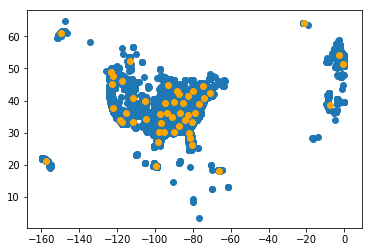

In [30]:
plt.scatter(df_us_sam['lng'], df_us_sam['lat'])
plt.scatter(centers['lng'], centers['lat'], color='orange')

In [33]:
for lt,ln in kmeans.cluster_centers_:
    print(lt,ln)

30.26936604935934 -97.78475464931597
51.530960540008536 -0.45688842662882223
37.694230875089225 -122.17340194887399
38.95928169436221 -76.86106650692417
21.28968866035076 -157.80697665215078
39.46024633743902 -89.73141468826829
26.029006061530502 -80.40702455178905
33.334075729292124 -117.17995226505484
47.61716299639086 -122.29979602200704
39.80110873243931 -105.1667050008289
35.47995595811847 -82.45924662442508
32.87842018163755 -96.93193645511977
42.35499282657057 -71.18276906586716
43.079171204052706 -79.72424846240526
40.69794586539091 -74.10684848315461
43.043832849573334 -88.53568407409333
61.16225492301588 -149.77308827936508
39.22851975645588 -94.83812541979994
30.32246679509356 -90.1096571135343
18.051577754624272 -66.2282505081503
41.540310120222465 -82.83139674213984
35.64096086331545 -97.45044921840666
36.09172994402954 -115.1482675467827
44.89334091836136 -93.36135051056687
38.72221309143498 -7.359354514990969
32.20157478324633 -87.355150511615
33.38143496549238 -111.7895

- plot these cluster centers
- plt.scatter(df['lat'], df['lng'], c=kmeans.labels_, cmap='rainbow')

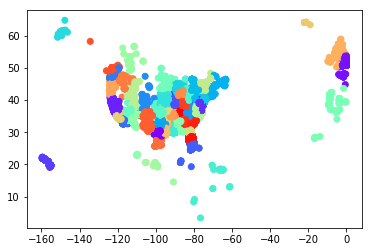

In [41]:
plt.scatter(df_us_sam['lng'], df_us_sam['lat'], c = kmeans.labels_, cmap='rainbow')

In [39]:
kmeans.labels_

array([ 3, 45, 12, ...,  3,  0,  3])

In [42]:
df_us_sam['centers'] = kmeans.labels_

In [48]:
df_us_sam.groupby('centers')['userid'].count()

centers
0     12002
1      2339
2     10703
3      3716
4      1511
5       820
6       967
7      2013
8      2272
9      1689
10      861
11    10186
12     2282
13     1216
14     5501
15      750
16       63
17     2799
18      481
19      173
20      944
21     1864
22     1896
23     1129
24      223
25      613
26      985
27      118
28      117
29     1181
30      394
31      589
32      238
33      500
34     4907
35       12
36     1694
37      776
38      878
39      644
40     2591
41      239
42      284
43      357
44      921
45     1117
46     1990
47      578
48     2436
49      650
Name: userid, dtype: int64

In [50]:
kmeans.cluster_centers_[35]

array([ 64.10623623, -21.52705976])

In [46]:
df_us_sam.head()

,userid,lat,lng,centers
958713,4466,38.952334,-77.447948,3
444404,1544,39.763549,-86.331929,45
763759,3252,42.051870,-70.185600,12
23305,112,30.255986,-97.746928,0
969760,4496,28.596401,-81.308044,48


In [71]:
from sklearn.datasets import load_iris
iris = load_iris()

In [73]:
iris['feature_names'], iris['target']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [74]:
irisdf = pd.DataFrame(iris['data'], columns=['sl', 'sw', 'pl', 'pw'])

In [75]:
irisdf

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [80]:
inertia=[]
for i in range(1,10):
    print("for ", i)
    ikm = KMeans(n_clusters=i)
    ikm.fit(irisdf)
    inertia.append(ikm.inertia_)

for  1
for  2
for  3
for  4
for  5
for  6
for  7
for  8
for  9


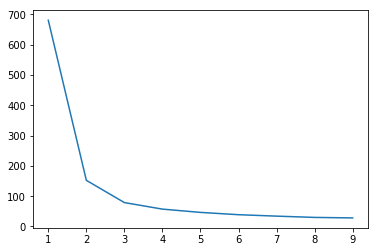

In [81]:
plt.plot(range(1,10), inertia)

In [82]:
df_us_sam.head()

,userid,lat,lng,centers
958713,4466,38.952334,-77.447948,3
444404,1544,39.763549,-86.331929,45
763759,3252,42.051870,-70.185600,12
23305,112,30.255986,-97.746928,0
969760,4496,28.596401,-81.308044,48


In [83]:
df_us_sam.to_csv('with-user-id-center.csv')